In [1]:
import pandas as pd
import numpy as np

raw = pd.read_pickle(r'../xvectors/xvector/predict_scoring_results__20210624T09211624519260.pkl').drop(columns=['r2'])
raw.speaker_group = raw.speaker_group.astype(str)
print(raw.shape, raw.dtypes)

(48, 10) model                object
num_epochs           object
lr                  float64
crit                 object
speaker_group        object
avg_mse             float64
avg_mae             float64
pearson_r           float64
p_value             float64
train_loss_folds     object
dtype: object


In [2]:
raw.loc[raw.groupby(['model', 'speaker_group', 'crit'])['pearson_r'].idxmax()].head(10)
raw.loc[raw.speaker_group=="['LARY']"].sort_values('pearson_r', ascending=False)

,model,num_epochs,lr,crit,speaker_group,avg_mse,avg_mae,pearson_r,p_value,train_loss_folds
44,Feed-forward,500,0.0001,effort,['LARY'],0.041220,0.132857,0.976299,3.607826e-22,"{0: [1.289197564125061, 1.2839192152023315, 1...."
40,Feed-forward,500,0.0001,intell,['LARY'],0.091663,0.132839,0.967422,4.698687e-20,"{0: [1.0622540712356567, 1.0602693557739258, 1..."
16,Feed-forward,200,0.0001,intell,['LARY'],0.174810,0.194255,0.942638,2.543805e-16,"{0: [1.012737512588501, 1.0107463598251343, 1...."
32,LinearModel,500,0.0001,effort,['LARY'],0.112176,0.156112,0.933573,2.320535e-15,"{0: [1.5047202110290527, 1.4864575862884521, 1..."
20,Feed-forward,200,0.0001,effort,['LARY'],0.120579,0.182811,0.921051,3.089256e-14,"{0: [1.2731072902679443, 1.2656246423721313, 1..."
28,LinearModel,500,0.0001,intell,['LARY'],0.376715,0.297502,0.919696,3.983567e-14,"{0: [1.5210219621658325, 1.5178327560424805, 1..."
4,LinearModel,200,0.0001,intell,['LARY'],0.650821,0.483332,0.870388,4.675793e-11,"{0: [1.1074329614639282, 1.105981469154358, 1...."
8,LinearModel,200,0.0001,effort,['LARY'],0.311982,0.319505,0.840856,9.084632e-10,"{0: [1.4072120189666748, 1.391895055770874, 1...."
36,Feed-forward,500,0.0001,overall,['LARY'],4.601586,1.178619,0.653846,3.685040e-05,"{0: [4.827536582946777, 4.826471328735352, 4.8..."
0,LinearModel,200,0.0001,overall,['LARY'],24.367697,4.503109,0.473024,5.434619e-03,"{0: [4.829952239990234, 4.82985258102417, 4.82..."


In [10]:
df = raw.copy().loc[ raw.groupby(['model', 'speaker_group', 'crit'])['pearson_r'].idxmin() ]
df

,model,num_epochs,lr,crit,speaker_group,avg_mse,avg_mae,pearson_r,p_value,train_loss_folds
23,Feed-forward,200,0.0001,effort,['CTRL'],0.174441,0.200233,0.810539,7.605494e-27,"{0: [1.3786457777023315, 1.376670241355896, 1...."
19,Feed-forward,200,0.0001,intell,['CTRL'],0.017545,0.055207,0.974193,1.201791e-71,"{0: [0.719344973564148, 0.7166693210601807, 0...."
15,Feed-forward,200,0.0001,overall,['CTRL'],0.416537,0.312052,0.894053,1.844648e-39,"{0: [2.6095917224884033, 2.6034767627716064, 2..."
22,Feed-forward,200,0.0001,effort,"['LARY', 'PARE']",0.124272,0.151015,0.937415,5.632462e-55,"{0: [0.42722180485725403, 0.4238252341747284, ..."
42,Feed-forward,500,0.0001,intell,"['LARY', 'PARE']",0.013903,0.036264,0.993284,1.658372e-110,"{0: [0.15713997185230255, 0.1543452888727188, ..."
14,Feed-forward,200,0.0001,overall,"['LARY', 'PARE']",0.486554,0.274542,0.955566,2.237242e-63,"{0: [0.6753450632095337, 0.6742798089981079, 0..."
20,Feed-forward,200,0.0001,effort,['LARY'],0.120579,0.182811,0.921051,3.089256e-14,"{0: [1.2731072902679443, 1.2656246423721313, 1..."
16,Feed-forward,200,0.0001,intell,['LARY'],0.174810,0.194255,0.942638,2.543805e-16,"{0: [1.012737512588501, 1.0107463598251343, 1...."
12,Feed-forward,200,0.0001,overall,['LARY'],10.495376,2.238282,0.433043,1.182685e-02,"{0: [4.898242473602295, 4.897247314453125, 4.8..."
21,Feed-forward,200,0.0001,effort,['PARE'],0.141325,0.165557,0.925046,1.208789e-36,"{0: [0.9100003242492676, 0.9085395336151123, 0..."


<AxesSubplot:>

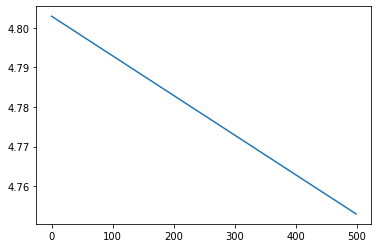

In [12]:
pd.Series(df.loc[24].train_loss_folds[0]).plot()

## Best in class

<AxesSubplot:title={'center':"['LARY'] MAE"}, xlabel='model'>

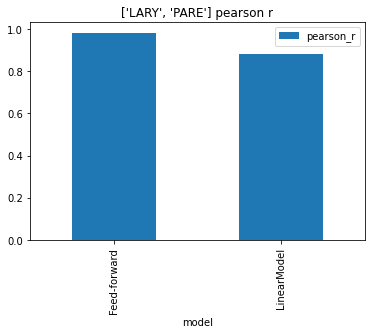

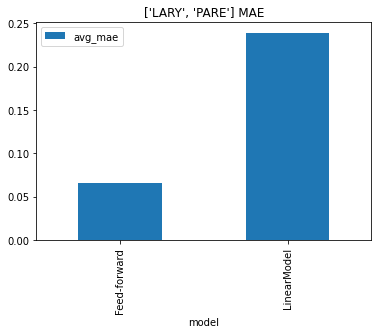

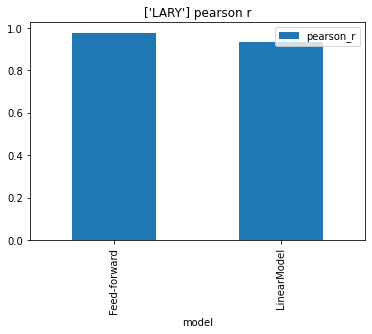

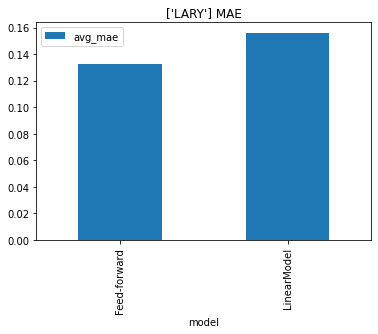

In [3]:
df = raw.copy().loc[ raw.groupby(['model', 'speaker_group', 'crit'])['pearson_r'].idxmax() ].sort_values(['speaker_group', 'crit', 'model'])
df = df.drop(columns=['num_epochs', 'lr'])
df.to_excel('predict_scoring_results__20210618T10421624005756.xlsx')

df.loc[df.crit=='effort'].loc[df.speaker_group=="['LARY', 'PARE']"].plot.bar('model', 'pearson_r', title="['LARY', 'PARE'] pearson r")
df.loc[df.crit=='effort'].loc[df.speaker_group=="['LARY', 'PARE']"].plot.bar('model', 'avg_mae', title="['LARY', 'PARE'] MAE")

df.loc[df.crit=='effort'].loc[df.speaker_group=="['LARY']"].plot.bar('model', 'pearson_r', title="['LARY'] pearson r")
df.loc[df.crit=='effort'].loc[df.speaker_group=="['LARY']"].plot.bar('model', 'avg_mae', title="['LARY'] MAE")

### Results table for LaTeX

In [4]:
df = df.rename(columns={'crit':'criteria', 'pearson_r':'r', 'avg_mae':'MAE'})
df = df.loc[df.model != 'SVR [poly]'].loc[df.model != 'SVR [rbf]']
print(df.loc[df.speaker_group=="['LARY', 'PARE']"].sort_values(['criteria', 'model']).groupby(['criteria', 'model']).max()[['r', 'MAE']])#.to_latex(column_format="llcc", float_format="%.4f"))

                              r       MAE
criteria model                           
effort   Feed-forward  0.981694  0.066162
         LinearModel   0.882242  0.239025
intell   Feed-forward  0.996407  0.035373
         LinearModel   0.958348  0.124406
overall  Feed-forward  0.981052  0.166643
         LinearModel   0.926161  0.470598
